In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import math
matplotlib.rcParams['figure.figsize'] = (8, 8)
import numpy as np
import os
import pandas as pd
import cv2

In [4]:
data = pd.read_csv('../data/sun_positions_101/2016_08_28.csv', index_col=0, parse_dates=True)
data = data.ix[:200]
data.head()

SyntaxError: invalid syntax (<ipython-input-4-b370324c72ec>, line 2)

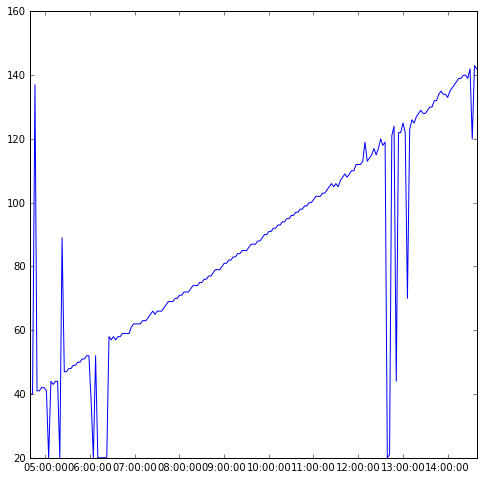

In [4]:
plt.plot(data['sunshader_angle'])

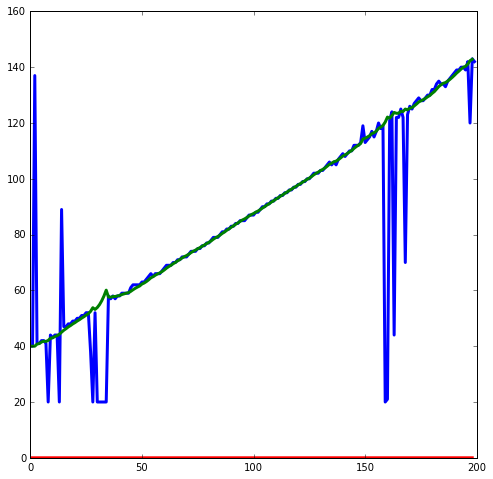

In [5]:
kalman = cv2.KalmanFilter(2, 1, 0)

code = long(-1)

kalman.processNoiseCov = np.array(((1, 0), (0 , 1e-4)))
kalman.measurementNoiseCov = 1e4 * np.ones((1, 1))
kalman.errorCovPost = np.ones((2, 2))

#
# Initialization
#
predictions = []
last_t = None
for row in data.iterrows():
    t, values = row
    measured_angle = values["sunshader_angle"]
    if last_t is None:
        kalman.statePost = np.array(((measured_angle,), (0.,)))
        last_t = t
        continue

    dt = (t-last_t).total_seconds()
    kalman.transitionMatrix = np.array([[1., dt], [0., 1.]])
    kalman.measurementMatrix = np.array([[1, dt]])

    prediction = kalman.predict()
    predictions.append(prediction)

    if abs(measured_angle-prediction[0,0]) > 10:
        continue

    kalman.correct(np.array(measured_angle).reshape(1,1))
    last_t = t

predictions = np.squeeze(predictions)
plt.figure()
plt.plot(data['sunshader_angle'].values, linewidth=3.0)
plt.plot(predictions, linewidth=3.0)

In [6]:
data['sunshader_angle'].values

array([  40.,   40.,  137.,   41.,   41.,   42.,   42.,   41.,   20.,
         44.,   43.,   44.,   44.,   20.,   89.,   47.,   47.,   48.,
         48.,   49.,   49.,   50.,   50.,   51.,   51.,   52.,   52.,
         38.,   20.,   52.,   20.,   20.,   20.,   20.,   20.,   58.,
         57.,   58.,   57.,   58.,   58.,   59.,   59.,   59.,   59.,
         61.,   62.,   62.,   62.,   62.,   63.,   63.,   64.,   65.,
         66.,   65.,   66.,   66.,   66.,   67.,   68.,   69.,   69.,
         69.,   70.,   70.,   71.,   71.,   72.,   72.,   72.,   73.,
         74.,   74.,   74.,   75.,   75.,   76.,   76.,   77.,   77.,
         78.,   79.,   79.,   79.,   80.,   81.,   81.,   82.,   82.,
         83.,   83.,   84.,   84.,   85.,   85.,   85.,   86.,   87.,
         87.,   87.,   88.,   88.,   89.,   90.,   90.,   91.,   91.,
         92.,   92.,   93.,   93.,   94.,   94.,   95.,   95.,   96.,
         96.,   97.,   97.,   98.,   98.,   99.,   99.,  100.,  100.,
        101.,  102.,

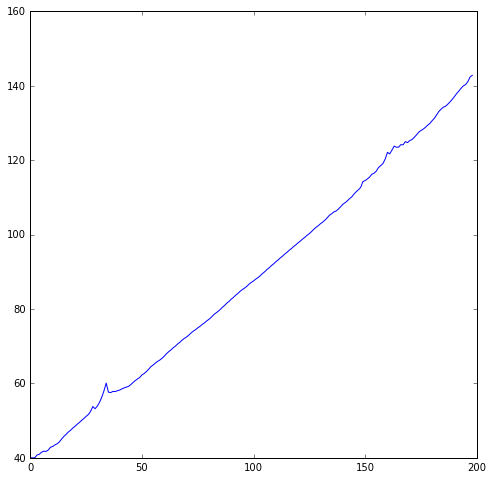

In [8]:
plt.plot(predictions[:,0])